In [1]:
import pandas as pd
import numpy as np
import json
# importing plot libraries
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
# Training models import statements
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
# Importing tensorflow requirements
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
weather_data = './WeatherEvents_Jan2016-Dec2021.csv'
data = pd.read_csv(weather_data)
df = pd.DataFrame(data)
newdf = df.drop('AirportCode',axis='columns')
print('Setup Complete')

Setup Complete


In [2]:
newdf.rename(columns={'EventId':'Year'},inplace=True)

In [3]:
datetimeFormat = '%Y-%m-%d %H:%M:%S'
newdf['StartTime(UTC)'] = pd.to_datetime(newdf['StartTime(UTC)'], format=datetimeFormat)
newdf['EndTime(UTC)'] = pd.to_datetime(newdf['EndTime(UTC)'], format=datetimeFormat)
newdf['Year'] = newdf['StartTime(UTC)'].dt.year
newdf['Duration'] = newdf['EndTime(UTC)'] - newdf['StartTime(UTC)']
#Formatting the Duration Data
newdf['Duration'] = newdf['Duration'].dt.total_seconds()
newdf['Duration'] = newdf['Duration']/(60*60)
newdf = newdf[(newdf['Duration']< 30*24) & (newdf['Duration'] != 0)]

In [4]:
newdf = newdf.dropna(axis=0)

In [5]:
newdf.groupby(['Year', 'Type', 'Severity', 'StartTime(UTC)', 'EndTime(UTC)',
       'Precipitation(in)', 'TimeZone', 'LocationLat', 'LocationLng', 'City',
       'County', 'State', 'ZipCode'],)


Text(0.5, 1.0, 'Weather Chart')

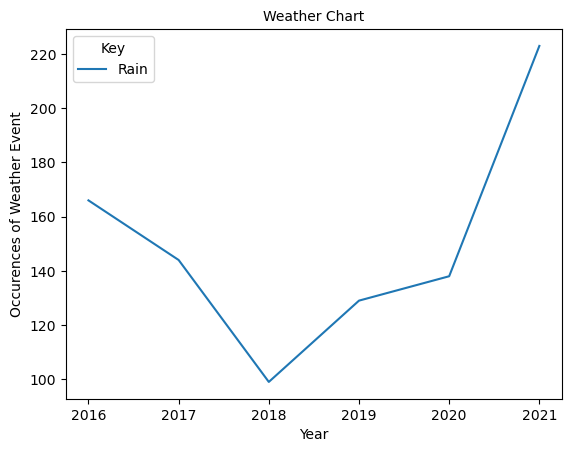

In [6]:
#This is code cell is used to create a chart of the occurences of a certain weather event
def getOccur(type,city,county,state):
    totalOcur = []
    i = 2016
    while i <= 2021:
        group1 = newdf.groupby(['Year','Type','City','County','State'])
        group2 = group1.get_group((i,type,city,county,state))
        total = len(group2)
        totalOcur.append(total)
        i+=1
    return totalOcur
yearIndex = ['2016','2017','2018','2019','2020','2021']
serData = getOccur('Fog','Burbank','Los Angeles','CA')
charser = pd.Series(data=serData,index=yearIndex)
charser.plot(x=charser.index, label='Rain',y=charser.values)
#Setting up Legend:
plt.legend(title='Key')
#Setting up Labels
plt.xlabel('Year',size=10)
plt.ylabel('Occurences of Weather Event', size=10)
plt.title("Weather Chart", size=10)

Text(0.5, 1.0, 'Weather Chart')

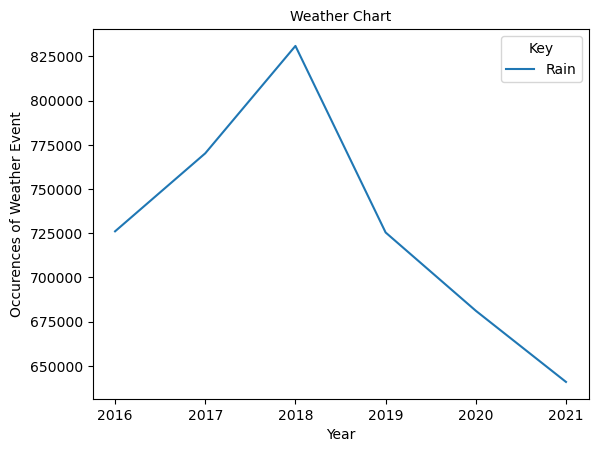

In [7]:
#Weather chart type occurrences nation wide:
def getOccur(type):
    totalOcur = []
    i = 2016
    while i <= 2021:
        group1 = newdf.groupby(['Year','Type'])
        group2 = group1.get_group((i,type))
        total = len(group2)
        totalOcur.append(total)
        i+=1
    return totalOcur
yearIndex = ['2016','2017','2018','2019','2020','2021']
serData = getOccur('Rain')
charser = pd.Series(data=serData,index=yearIndex)
charser.plot(x=charser.index, label='Rain',y=charser.values)
#Setting up Legend:
plt.legend(title='Key')
#Setting up Labels
plt.xlabel('Year',size=10)
plt.ylabel('Occurences of Weather Event', size=10)
plt.title("Weather Chart", size=10)

Text(0.5, 1.0, 'Weather Chart')

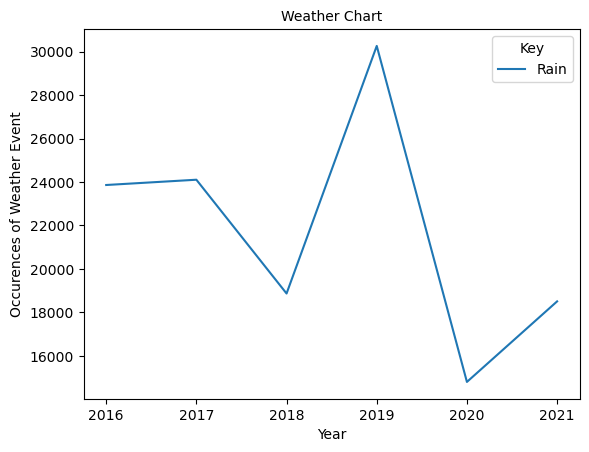

In [8]:
#Weather Chart type occurrences state wide:
def getOccur(type,state):
    totalOcur = []
    i = 2016
    while i <= 2021:
        group1 = newdf.groupby(['Year','Type','State'])
        group2 = group1.get_group((i,type,state))
        total = len(group2)
        totalOcur.append(total)
        i+=1
    return totalOcur
yearIndex = ['2016','2017','2018','2019','2020','2021']
serData = getOccur('Rain','CA')
charser = pd.Series(data=serData,index=yearIndex)
charser.plot(x=charser.index, label='Rain',y=charser.values)
#Setting up Legend:
plt.legend(title='Key')
#Setting up Labels
plt.xlabel('Year',size=10)
plt.ylabel('Occurences of Weather Event', size=10)
plt.title("Weather Chart", size=10)

In [9]:
# This code cell to calculate the total Precipitation(in) per year based on the county and the city.
preTotal = newdf.groupby(['Year','City','County','State'])
# I can use the getgroup() function then continue using it till i get my desired results

desiredGroup = preTotal.get_group((2016,"Lander","Fremont","WY"))
preciptationTotal = desiredGroup['Precipitation(in)'].sum() 
print(preciptationTotal)

71.03


Text(0.5, 1.0, 'Precipitation Chart')

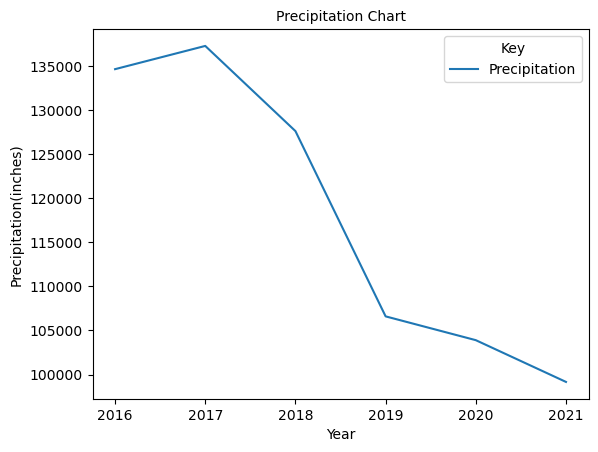

In [10]:
#This code cell is used to plot the total precipitation per year:
def getPrecip():
    preData = []
    groupedbyYear = newdf.groupby('Year')
    for i in range(2016, 2022):
        curYear = groupedbyYear.get_group(i)
        totalPre = curYear['Precipitation(in)'].sum()
        preData.append(totalPre)
    return preData
yearList = getPrecip()
yearIndex = ['2016','2017','2018','2019','2020','2021']
preSer = pd.Series(data=yearList, index=yearIndex)
preSer.plot(x=preSer.index, label='Precipitation', y=preSer.values)
plt.legend(title='Key')
#Setting up Labels
plt.xlabel('Year',size=10)
plt.ylabel('Precipitation(inches)', size=10)
plt.title("Precipitation Chart", size=10)


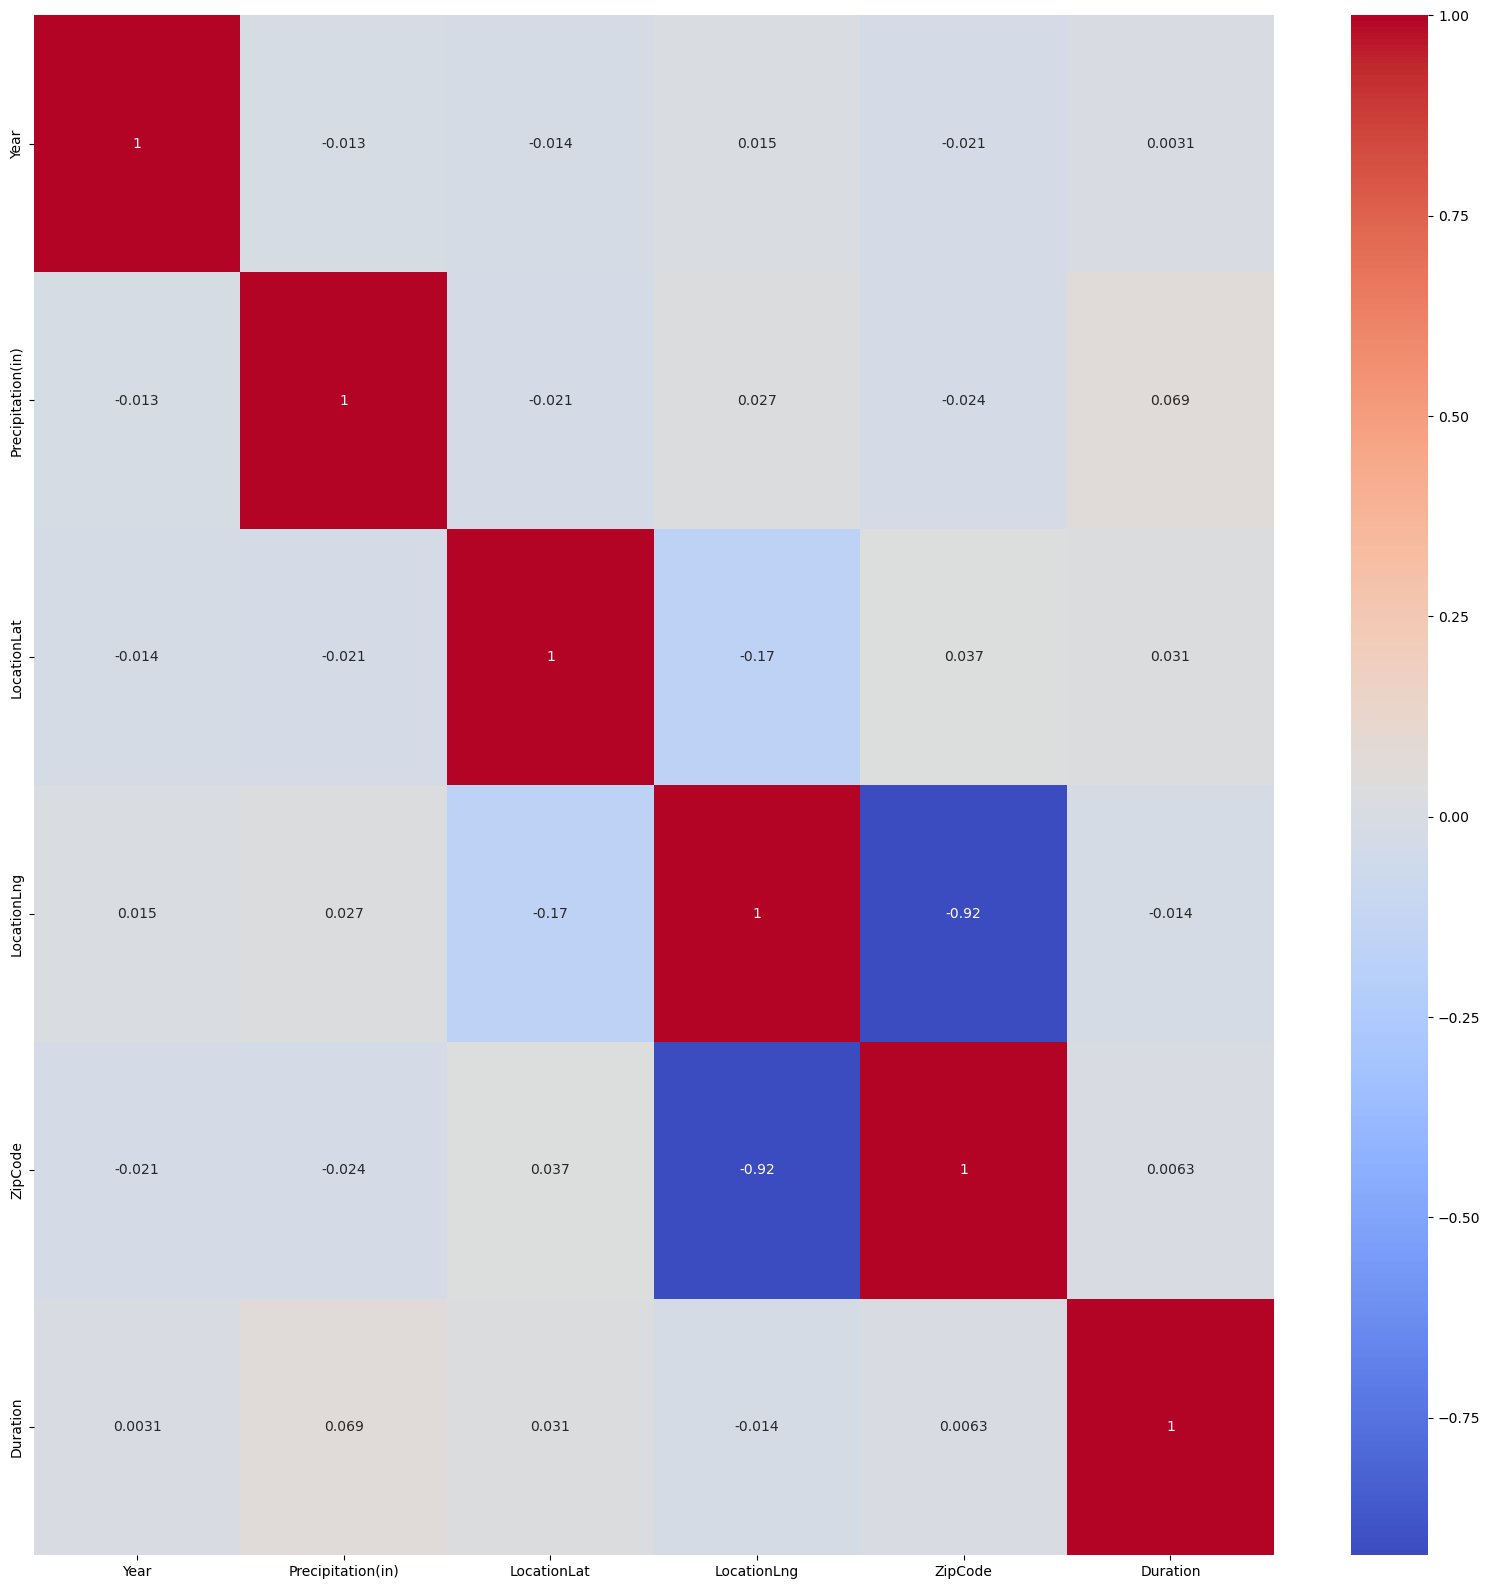

In [11]:
import seaborn as sns
correlations = newdf.corr(method='pearson')
plt.figure(figsize=(20, 20))
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

In [12]:
newdf2 = newdf.groupby(['ZipCode','City','State', 
                  'LocationLat', 'LocationLng','Type']).agg({'Duration':['sum']}).reset_index()
newdf2.columns=pd.MultiIndex.from_tuples((("ZipCode", " "),("City", " "),
                                       ("State", " "), ("LocationLat", " "),
                                       ("LocationLng", " "), ("Type", " "), ("Duration", " ")))
newdf2.columns = newdf2.columns.get_level_values(0)
newdf2['Duration'] = newdf2['Duration']/(24*4*3.65) #yearly percentage  
newdf2 = newdf2.sort_values(by='Duration')
newdf2.tail(3)

,ZipCode,City,State,LocationLat,LocationLng,Type,Duration
11557,98331.0,Forks,WA,47.9375,-124.5550,Rain,26.874287
11392,97497.0,Wolf Creek,OR,42.6000,-123.3656,Fog,29.516981
10694,91932.0,Imperial Beach,CA,32.5630,-117.1109,Cold,35.975790


In [13]:
newdf_flat = newdf2.pivot_table(index='ZipCode', columns='Type', values=['Duration']).reset_index().fillna(0)
newdf_flat.columns=pd.MultiIndex.from_tuples(((' ', 'ZipCode'),(' ', 'Cold'),(' ', 'Fog'),
            (' ',  'Hail'),(' ', 'Precipitation'),(' ', 'Rain'),(' ', 'Snow'),(' ', 'Storm')))
newdf_flat.columns = newdf_flat.columns.get_level_values(1)
#df_flat().tail(3)
uniqueKey = newdf2[['ZipCode', 'City', 
                 'State', 'LocationLat', 'LocationLng']].sort_values(by='ZipCode').drop_duplicates()
weatherinfo = pd.merge(newdf_flat, uniqueKey, how='inner', on='ZipCode')
weatherinfo.tail(3)

,ZipCode,Cold,Fog,Hail,Precipitation,Rain,Snow,Storm,City,State,LocationLat,LocationLng
2050,99224.0,0.006754,6.789717,0.023449,0.007135,9.489964,5.623954,0.048421,Spokane,WA,47.6214,-117.5278
2051,99301.0,0.144692,4.715753,0.001903,0.002854,5.540240,1.643503,0.009085,Pasco,WA,46.2696,-119.1181
2052,99362.0,0.301893,6.014127,0.000476,0.001284,9.814450,1.964184,0.019073,Walla Walla,WA,46.0946,-118.2858


In [14]:
X = newdf_flat.drop(['ZipCode','Cold', 'Hail'], axis=1)
X.tail(3)

,Fog,Precipitation,Rain,Snow,Storm
2017,6.789717,0.007135,9.489964,5.623954,0.048421
2018,4.715753,0.002854,5.540240,1.643503,0.009085
2019,6.014127,0.001284,9.814450,1.964184,0.019073


In [16]:
#Prepping the data for modeling
from sklearn.cluster import KMeans

distortions = []
K = range(1,20)
for i in K:
    kmean = KMeans(n_clusters=i, random_state=0, n_init=50, max_iter=500)
    kmean.fit(X)
    distortions.append(kmean.inertia_)

AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
# Creating the clusters for city wide distributions
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)

newdf_flat['Cluster'] = (kmeans.labels_).astype(str)
newdf_cluster = pd.merge(newdf_flat[['ZipCode','Cluster']], weatherinfo.drop(['Cold','Hail'], axis=1), 
                      how='inner', on='ZipCode')
newdf_cluster.tail(3)

,ZipCode,Cluster,Fog,Precipitation,Rain,Snow,Storm,City,State,LocationLat,LocationLng
2050,99224.0,1,6.789717,0.007135,9.489964,5.623954,0.048421,Spokane,WA,47.6214,-117.5278
2051,99301.0,0,4.715753,0.002854,5.540240,1.643503,0.009085,Pasco,WA,46.2696,-119.1181
2052,99362.0,3,6.014127,0.001284,9.814450,1.964184,0.019073,Walla Walla,WA,46.0946,-118.2858


In [ ]:
# City Wide cluster distribution scatter chart
fig_cluster = px.scatter_geo(newdf_cluster, lat='LocationLat', lon='LocationLng',
                      hover_name=weatherinfo['City'] + ', ' + weatherinfo['State'],
                      scope="usa",
                      color_discrete_sequence =['#AB63FA', '#EF553B', '#00CC96','#636EFA'],
                      color = 'Cluster',
                      title ='City wide weather cluster distribution')
fig_cluster.update_layout(height=400, width=400)
fig_cluster.show()

In [ ]:
# Creating the clusters for state wide distributions
newdf_cluster2 = newdf_cluster.groupby(['State','Cluster']).agg({'Cluster':['count']}).reset_index()
newdf_cluster2.columns=pd.MultiIndex.from_tuples((("State", " "),("Cluster", " "),("Count", " ")))
newdf_cluster2.columns = newdf_cluster2.columns.get_level_values(0)


newdf_loc = newdf_cluster[['State','Cluster','LocationLat', 'LocationLng']]
newdf_loc1 = newdf_loc.groupby(['State','Cluster']).agg({'LocationLat':'mean'}).reset_index()
newdf_loc2 = newdf_loc.groupby(['State','Cluster']).agg({'LocationLng':'mean'}).reset_index()
newdf_loc3 = pd.merge(newdf_loc1,newdf_loc2, how='inner', on=['State','Cluster'])


newdf_clusterS = pd.merge(newdf_loc3,newdf_cluster2, how='inner', on=['State','Cluster'])
newdf_clusterS.tail(3) #state with each cluster count location

,State,Cluster,LocationLat,LocationLng,Count
119,WV,3,38.709213,-80.693020,15
120,WY,0,42.751768,-107.213984,19
121,WY,1,42.674231,-107.517223,35


In [ ]:
# State wide cluster distributions scatter chart
fig_clusterS = px.scatter_geo(newdf_clusterS, lat='LocationLat', lon='LocationLng', 
                     color='Cluster',
                     size='Count',
                     color_discrete_sequence=['#636EFA', '#AB63FA', '#EF553B','#00CC96'],
                     hover_name='State',
                     scope="usa",
                     title = 'fig 10. State wide weather cluster distribution')
fig_clusterS.update_layout(height=400, width=400)
fig_clusterS.show()

In [ ]:
# Code cell to display the cluster properties:
prop = newdf_cluster[['Cluster', 'Fog',
                   'Precipitation','Rain', 'Snow', 'Storm']].groupby(['Cluster']).mean().reset_index()
prop2 = prop.transpose().reset_index()
prop2 = prop2[(prop2['index'] !='Cluster')].sort_values(by=0)
prop2

,index,0,1,2,3
5,Storm,0.098486,0.116881,0.046734,0.018666
2,Precipitation,0.100483,0.1069,0.040047,0.141659
4,Snow,1.113907,6.882235,0.630251,1.097662
1,Fog,2.181636,3.019121,11.765109,3.146215
3,Rain,3.570913,6.805769,5.529399,9.822949


In [ ]:
from plotly.subplots import make_subplots
fig_prop=make_subplots(rows=1, cols=4, shared_yaxes=True,horizontal_spacing=0)

fig_prop.add_trace(go.Bar(x=prop2['index'], y=prop2[0], name='Cluster 0'), row=1, col=1)
fig_prop.add_trace(go.Bar(x=prop2['index'], y=prop2[1], name='Cluster 1'), row=1, col=2)
fig_prop.add_trace(go.Bar(x=prop2['index'], y=prop2[2], name='Cluster 2'), row=1, col=3)
fig_prop.add_trace(go.Bar(x=prop2['index'], y=prop2[3], name='Cluster 3'), row=1, col=4)

fig_prop.update_yaxes(title_text="duration%/year", row=1, col=1)
fig_prop.update_layout(title_text="Weather distribution in each cluster")
fig_prop.update_layout(height=500, width=500)
fig_prop.show()